In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

###1. Data Preprocessing:

In [19]:
# Load the dataset
data = pd.read_csv('HistoricalQuotes.csv')
print("Dataset loaded successfully.")

# Remove any leading or trailing spaces in column names
data.columns = data.columns.str.strip()

# Clean 'Close/Last' column by removing non-numeric characters and converting to float
data['Close/Last'] = data['Close/Last'].replace('[\$,]', '', regex=True).astype(float)

# Extract 'Close/Last' column for processing
close_prices = data['Close/Last'].values.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices)

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(close_prices_scaled) * 0.8)
train_data = close_prices_scaled[:train_size]
test_data = close_prices_scaled[train_size:]

Dataset loaded successfully.


###2. Create Training Sequences:

In [20]:
# Define sequence length (e.g., 60 days)
sequence_length = 60

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Generate sequences for training and testing sets
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape data for RNN model input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

###3. Build the RNN Model:

In [21]:
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


###4. Train the Model:

In [22]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0860 - val_loss: 1.5956e-05
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.4027e-04 - val_loss: 2.0120e-04
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.2824e-05 - val_loss: 1.3355e-04
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.0961e-05 - val_loss: 1.8173e-04
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.0145e-04 - val_loss: 7.8691e-05
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 7.2837e-05 - val_loss: 2.7565e-05
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.5374e-05 - val_loss: 3.8188e-05
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.7315e-05 - val_loss: 5.6665e-05
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.2120e-05 - val_loss: 8.5153e-05
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.9366e-05 - val_loss: 7.5527e-05
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.9390e-05 - 

###5. Make Predictions:

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


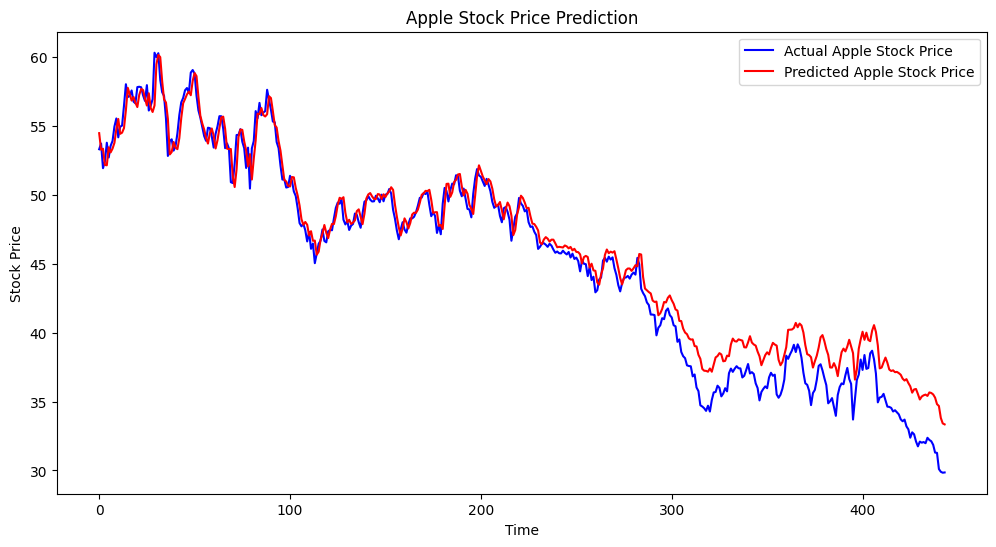

In [23]:
# Predict the stock prices on the test set
predicted_prices = model.predict(X_test)
# Transform predictions back to the original scale
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predicted vs. actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, color='blue', label='Actual Apple Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

###6. Evaluation:

In [24]:
# Calculate Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Report Metrics
print("\nThe model's performance shows:")
print("- MAE: {:.4f}".format(mae))
print("- RMSE: {:.4f}".format(rmse))

Mean Absolute Error (MAE): 1.2789659476340354
Root Mean Squared Error (RMSE): 1.651510683980992

The model's performance shows:
- MAE: 1.2790
- RMSE: 1.6515


<!-- ####1. Data Preprocessing:
- The dataset was cleaned by removing non-numeric characters (e.g., dollar signs) from the "Close" column.
- Normalized the "Close" prices using Min-Max scaling to compress values into a range between 0 and 1.
- Split the dataset into training (80%) and testing (20%) sets to evaluate the model effectively.

####2. Creating Sequences for Training :
- Generated 60-day sequences of "Close" prices, where each sequence is used to predict the next day’s stock price.
- This sequential approach helps the model capture temporal patterns and trends in stock prices.

####3. Model Architecture :
- Built an RNN model with a single SimpleRNN layer of 50 units and one Dense layer for output.
- Used mean squared error (MSE) as the loss function and Adam as the optimizer.
- This model architecture allows for memory of previous values in the sequence to forecast the next price.

####4. Training and Prediction :
- Trained the model on the training set for 50 epochs with a batch size of 32.
- Validation data was used to monitor the model for overfitting.
- Transformed the model's predictions back to the original scale for direct comparison with actual stock prices.

####5. Evaluation :
- Evaluated the model using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) metrics.
- Plotted actual vs. predicted prices to visualize the model’s performance.
- Observed that the model captures general stock price trends but lacks precision in volatile regions. -->


####1. Model Performance Analysis
Mean Absolute Error (MAE):

- MAE is 1.2790, indicating the model’s average absolute difference between predicted and actual stock prices is relatively low.
- This suggests reasonable accuracy and that the model effectively tracks overall price movements.
Root Mean Squared Error (RMSE):

- RMSE is 1.6515, which is close to MAE, indicating stable performance with minimal large deviations in predictions.
- RMSE, which penalizes larger errors more heavily, is slightly higher than MAE but shows that extreme errors are minimal.

####2. Prediction Plot Analysis
Alignment with Actual Prices:

- Predicted values (red line) closely follow actual values (blue line), with some minor deviations.
Trend Capturing:

- The model captures the general trend of stock prices and aligns closely with actual prices over time.
Minor Divergences:

- Small divergences are observed during minor fluctuations, but overall alignment is strong, indicating that the model has learned the trend well.

####3.Model Strengths
Good Trend Tracking:

- The model captures the general direction of stock prices, making it useful for identifying long-term trends.
Low Error Rates:

- With low MAE and RMSE values, the model performs well on this dataset and provides reasonably accurate short-term forecasts.

####4.Limitations
Limited Responsiveness to Sharp Changes:

- The model may miss finer details or sudden market shifts, as is common with RNN models.
 Potential Overfitting on Sequential Patterns:

- Stock prices can be influenced by external factors (e.g., news events, market sentiment), which are not represented in the historical data, potentially affecting model accuracy.

####5. Potential Improvements
Advanced Architectures:

- Experimenting with LSTM or GRU layers could improve the model's ability to capture more complex patterns in the data.
Feature Addition:

- Including additional features, such as trading volume or other financial indicators, could enhance model robustness and predictive power.


